In [63]:
from generate_lib import *

In [64]:
SHOW_PLOTS = True
SAVE_PLOTS = True

In [65]:
def get_frac_variance(idx_range):
    frac_variances = list()
    
    for idx in idx_range:
        # Gets the file path to the desired data.
        p = os.path.join(path, data_files[idx])

        # Gets the expecation values as an ordered list.
        data = get_data(p)['axes']['y']

        # Calculates the fractional variance.
        max = np.nanmax(data)
        min = np.nanmin(data)
        median = np.nanmedian(data)
        frac_variance = (max - min) / median

        # Checks for outliers.
        if frac_variance > 1.0:
            output = '''High fractional variance in {file}! Skipped this data. Check the file for potential bad data.

            Fractional variance: {fv}
            Max expectation value: {max}
            Min expectation value: {min}
            Median expectation value: {median}
            File index: {idx}
            '''.format(fv = frac_variance, max = max, min = min, median = median, idx = idx, file = data_files[idx].replace('.csv', ''))

            print(output)

            continue
        
        # Appends the fractional variance to a list.
        frac_variances.append(frac_variance)

    return frac_variances

def plot_data(data, idx_range, savename, logx = True):
    (fig, ax) = plt.subplots()

    x = np.log10(data) if logx else data
    
    label = '{f1}-{f2}'.format(f1 = data_files[idx_range[0]].replace('.csv', ''), f2 = data_files[idx_range[-1]].replace('.csv', ''))

    plt.hist(x, bins = 9, label = label)

    xlabel = 'Log10 Fractional Variance log10((max - min) / median)' if logx else 'Fractional Variance ((max - min) / median)'

    ax.set_title('Distribution of Expecation Values', fontsize = 15)
    ax.set_xlabel(xlabel, fontsize = 12)
    ax.set_ylabel('Frequency', fontsize = 12)

    min_variance = np.min(x)
    max_variance = np.max(x)

    ax.set_xlim(min_variance, max_variance)

    ax.xaxis.set_major_locator(tck.LinearLocator(numticks = 10))
    ax.xaxis.set_major_formatter(tck.FormatStrFormatter('%.3f'))

    ax.legend()

    if SHOW_PLOTS:
        plt.show()

    if SAVE_PLOTS:
        prefix = 'log10-' if logx else ''

        save_path = os.path.join(os.pardir, 'results', 'frac-variation', prefix + savename)
        fig.savefig(save_path, dpi = 300)


In [66]:
def run(idx_range):
    data = get_frac_variance(idx_range)

    plot_data(data, idx_range, 'frac-variance-histogram', logx = False)
    plot_data(data, idx_range, 'frac-variance-histogram', logx = True)

High fractional variance in sysSim_16_randomO! Skipped this data. Check the file for potential bad data.

            Fractional variance: 1.1740593776742352
            Max expectation value: 0.03527284004068147
            Min expectation value: 0.009178725921979132
            Median expectation value: 0.02222554890741024
            File index: 32
            


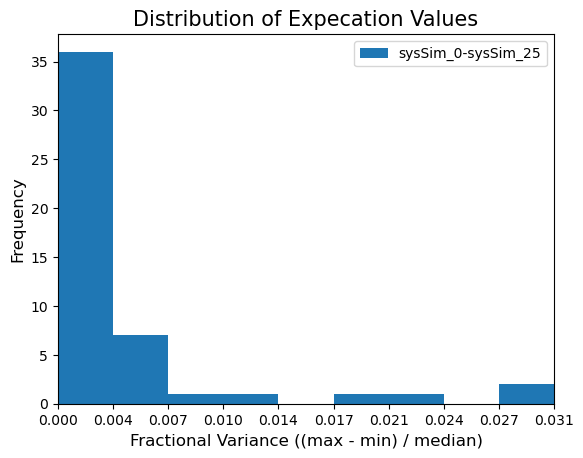

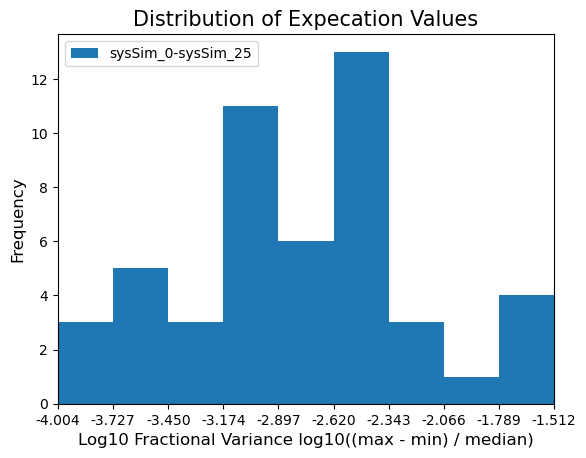

In [67]:
r = list(range(round(len(data_files)*0.025)))

run(r)